# Media Company case study
Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [1]:
import numpy as numpyp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Dataset
media = pd.read_csv('mediacompany.csv')

## Data Exploration

In [3]:
# see the media data frame
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
# drop the unnamed column which has all NaN values
media.drop(columns='Unnamed: 7',axis=1,inplace=True)

In [5]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [6]:
# converting 'date' column to pandas date/time format
media['Date'] = pd.to_datetime(media['Date'])
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [7]:
# Deriving "days since the show started"
from datetime import datetime

d0 = datetime(2017, 2, 28)
d1 = media.Date
delta = d1 - d0
media['day']= delta

In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [9]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [10]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


## Data Visualization

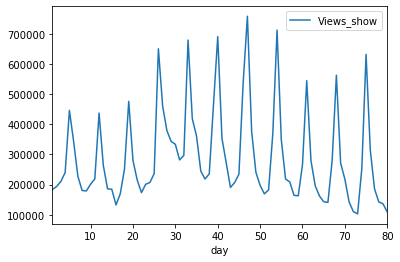

In [11]:
# plot a graph between Days vs Views_show
media.plot.line('day','Views_show')

From the graph we can see Views are more on weekends

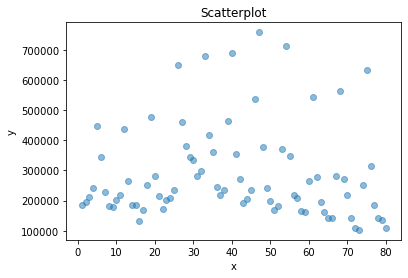

In [12]:
# scatter plot Days vs Views show
plt.scatter(media.day,media.Views_show,alpha=0.5)
plt.title('Scatterplot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

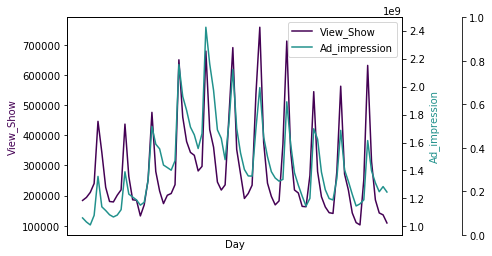

In [13]:
# plot for day vs views_show and day vs add_immpression
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx() # it will craete a twin y axis sharing the x-axis
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

We can see Views_show is more related to add _ impression on weekends

In [15]:
# Derived Metrics
# weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7,inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


## Model creation and evaluation

### Running first model (lm1) weekday & visitors

In [16]:
# Putting feature variable to x
X = media[['Visitors','weekday']]
y = media['Views_show']

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # Creating linearregression object

In [18]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

C:\Users\annup\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           8.01e-12
Time:                        10:19:36   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

From the summary it is evident that our r^2 value is not very good , so lets check what are views on weekend only by creating a variable weekend.

In [20]:
# craete a variable,with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7==5 : return 1
    elif i % 7==4 : return 1
    else: return 0
    return i
media['weekend'] = [cond(i) for i in media['day']]

In [21]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


### Running second model(lm2) visitors and weekend

In [23]:
# putting feature variable to X
X = media[['Visitors','weekend']]
y = media[['Views_show']] # putting responce variable to y

In [26]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           2.51e-12
Time:                        10:51:02   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

So we can see from the summary that weekend has some impact on views

Now lets see if charachter A has any impact on views
### Running third model (lm3) visitors, weekend & charchter A

In [27]:
# putting feature variable to X
X = media[['Visitors','weekend','Character_A']]
y = media['Views_show']

In [28]:
X = sm.add_constant(X)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.53e-14
Time:                        10:57:07   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

C:\Users\annup\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


So from our summary of lm3 we can see that r^2 value is increased considerably by adding charchter A

Now lets check what impact add_impression has on views

### Creating 4th model (lm4) with add_impression

In [31]:
# adding feature variables to X
X = media[['Visitors','weekend','Character_A','Ad_impression']]
y = media['Views_show']

In [33]:
X = sm.add_constant(X)
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.10e-25
Time:                        11:14:41   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

C:\Users\annup\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


From the summary we can see our r^2 value is now 80% which very good but visitors p value is insignificant, so lets remove visitors first and make another model

### Creating 5th model (lm5) 

In [34]:
X = media[['weekend','Ad_impression','Character_A']]
y = media['Views_show']

In [35]:
X = sm.add_constant(X)
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.05e-26
Time:                        11:23:14   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

C:\Users\annup\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


So we can see our R^2 value is great but still Ad_impression coef if very less, maybe because it is in millian so lets divide ad_impression by 1 million

In [36]:
media['Ad_impression_million'] = media['Ad_impression']/1000000

### Create 6th model(lm6) with Ad_impression_million

In [37]:
X = media[['weekend','Ad_impression_million','Character_A']]
y = media['Views_show']

In [38]:
X = sm.add_constant(X)
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.05e-26
Time:                        11:31:58   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

C:\Users\annup\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


since still character A is making a negative impact , lets remove it.

### Create 7th and final model with feature variables Ad_impression_million and weekend

In [40]:
X = media[['weekend','Ad_impression_million',]]
y = media['Views_show']
X = sm.add_constant(X)
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.95e-27
Time:                        11:38:51   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+

C:\Users\annup\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


From the summmary we can see our model is now perfect to predict and visualize

## Making Prediction using 7th model

In [41]:
Predicted_views = lm_7.predict(X)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show,Predicted_views)
r_squared = r2_score(media.Views_show,Predicted_views)

In [43]:
print('mse;',mse)
print('r^2:',r_squared)

mse; 4797239258.824437
r^2: 0.7975978797926214


Text(0, 0.5, 'Views')

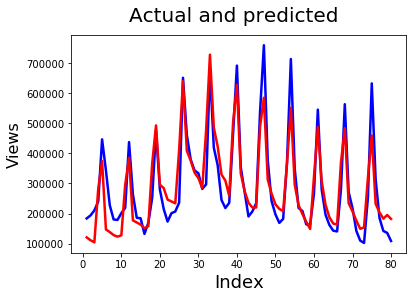

In [46]:
# Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show,color='b',linewidth=2.5,linestyle='-')
plt.plot(c,Predicted_views,color='r',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views',fontsize=16)